#Preliminary operations

##Import libraries

In [1]:
# import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# stats
from scipy import stats
#scaling, normalization
from sklearn.preprocessing import StandardScaler
# train, test, split
from sklearn.model_selection import train_test_split
# naive bayes gaussian classifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
# repeated stratified kfold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
# randomized and grid search cv
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Dummy clf
from sklearn.dummy import DummyClassifier

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

##Mount Google Drive

In [5]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import datasets

In [6]:
# import dataframe (without outliers)
df = pd.read_excel("drive/MyDrive/Progetto Data Mining 1/Data Understanding & Preparation/Data prepared final/df_prep_final.xlsx", index_col="Unnamed: 0")
df_emph_high = pd.read_excel("drive/MyDrive/Progetto Data Mining 1/Data Understanding & Preparation/Data prepared final/df_prep_final_emph_high.xlsx", index_col="Unnamed: 0")
df_emph_low = pd.read_excel("drive/MyDrive/Progetto Data Mining 1/Data Understanding & Preparation/Data prepared final/df_prep_final_emph_low.xlsx", index_col="Unnamed: 0")

In [7]:
df.columns

Index(['vocal_channel', 'emotion', 'emotional_intensity', 'statement',
       'repetition', 'actor', 'sex', 'channels', 'length_ms', 'intensity',
       'zero_crossings_sum', 'mfcc_mean', 'mfcc_max', 'sc_mean', 'sc_std',
       'sc_min', 'sc_max', 'sc_kur', 'stft_mean', 'stft_std', 'stft_min',
       'stft_kur', 'mean', 'kur', 'skew', 'loudness', 'emotion_type'],
      dtype='object')

In [8]:
# get data columns
df_data = df.loc[:, "length_ms":"skew"]
df_data_emph_high = df_emph_high.loc[:, "length_ms":"skew"]
df_data_emph_low = df_emph_low.loc[:, "length_ms":"skew"]

# get values from data columns
X = df_data.values
X_emph_high = df_data_emph_high.values
X_emph_low = df_data_emph_low.values

# get emotion lables from each emphasis group
y_emotion = df["emotion"]
y_emotion_emph_high = df_emph_high["emotion"]
y_emotion_emph_low = df_emph_low["emotion"]

# get emotion type from each emphasis group
y_emtype = df["emotion_type"]
y_emtype_emph_high = df_emph_high["emotion_type"]
y_emtype_emph_low = df_emph_low["emotion_type"]

COSE DA FARE PER LA CLASSIFICAZIONE (PER OGNI MODELLO):

Le cose che facciamo le facciamo per tutti e 3 i dataset (all emphasis, high emphasis e low emphasis). Facciamo la classificazione per le due variabili che abbiamo usato anche nel Clustering: "emotions" e "emotional_type" (strong, weak).

* Dividere in "training_set" (80%) e "test_set" (20%)
* Usare il "training_set" per fare la Cross_Validation stratificata (Stratified Cross Validation) in 10 parti per testare gli iperparametri, con Grid-Search se non va troppo lento; se va lento usiamo Randomized-Search.
* Testare la classificazione su tutte e due le variabili dette prima, per ognuno dei 3 dataset che abbiamo
* Misuarci tutte le metriche possibili e immaginabili che ha fatto vedere lo Spinnnato in laboratorio
* Fine, basta, boh. Bona cisi e se un cisi bona

#Hyperparameters tuning (only on "emotion")

In [9]:
# split train- and test- set
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_emotion,
    test_size=0.2, 
    random_state=0,
    stratify=y_emotion
)

In [10]:
# get two baseline (for validation- and for test- set)
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)
dummy_clf.fit(X_train, y_train)

print(dummy_clf.score(X=None, y=y_train))
print(dummy_clf.score(X=None, y=y_test))

0.14737378888322283
0.1425661914460285


In [11]:
# GridSearchCV
param_grid = {
            'priors': [None],
            'var_smoothing': np.logspace(0,-9, num=100),
         }

grid = GridSearchCV(
    GaussianNB(),
    param_grid = param_grid,
    cv=RepeatedStratifiedKFold(
        n_splits = 20, 
        n_repeats = 3, 
        random_state = 0
    ),
    n_jobs = -1,
    refit = True
)

In [12]:
# fit GridSearchCV
grid.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=20, random_state=0),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None],
                         'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.1113...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [13]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'priors': None, 'var_smoothing': 5.336699231206302e-09}
0.354397718683433
GaussianNB(var_smoothing=5.336699231206302e-09)


In [14]:
clf = grid.best_estimator_
clf.score(X_test, y_test)

0.35030549898167007

#Emotions

##All emphasis

In [15]:
# split train- and test- set
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_emotion,
    test_size=0.2, 
    random_state=0,
    stratify=y_emotion
)

In [16]:
# get two baseline (for validation- and for test- set)
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)
dummy_clf.fit(X_train, y_train)

print(dummy_clf.score(X_test, y_test))

0.1425661914460285


In [17]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.48      0.61      0.54        75
        calm       0.53      0.52      0.53        75
     disgust       0.29      0.26      0.27        39
     fearful       0.37      0.21      0.27        75
       happy       0.29      0.29      0.29        75
     neutral       0.26      0.24      0.25        38
         sad       0.28      0.11      0.15        75
   surprised       0.21      0.56      0.30        39

    accuracy                           0.35       491
   macro avg       0.34      0.35      0.33       491
weighted avg       0.36      0.35      0.34       491



In [19]:
y_test_pred_proba = clf.predict_proba(X_test)

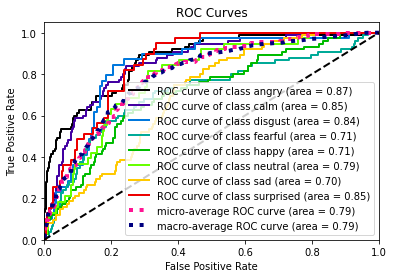

0.7906231598271247


In [20]:
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro"))

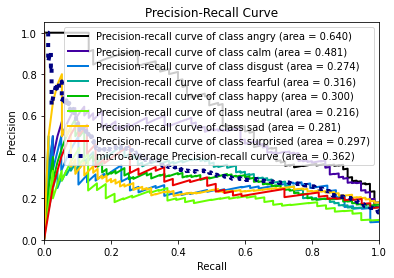

In [21]:

plot_precision_recall(y_test, clf.predict_proba(X_test))
plt.show()

##All emphasis (50% samples)

In [24]:
# split train- and test- set
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_emotion,
    train_size=0.5,
    test_size=0.2, 
    random_state=0,
    stratify=y_emotion
)

# standardizing the new training set and the test set
std_sclr = StandardScaler()
std_sclr.fit(X_train)
X_train = std_sclr.transform(X_train)
X_test = std_sclr.transform(X_test)

In [25]:
# get two baseline (for validation- and for test- set)
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)
dummy_clf.fit(X_train, y_train)

print(dummy_clf.score(X_test, y_test))

0.13441955193482688


In [26]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.50      0.65      0.57        75
        calm       0.50      0.47      0.48        75
     disgust       0.23      0.31      0.26        39
     fearful       0.35      0.24      0.28        75
       happy       0.40      0.43      0.41        75
     neutral       0.31      0.29      0.30        38
         sad       0.39      0.16      0.23        75
   surprised       0.28      0.51      0.36        39

    accuracy                           0.38       491
   macro avg       0.37      0.38      0.36       491
weighted avg       0.39      0.38      0.37       491



In [28]:
y_test_pred_proba = clf.predict_proba(X_test)

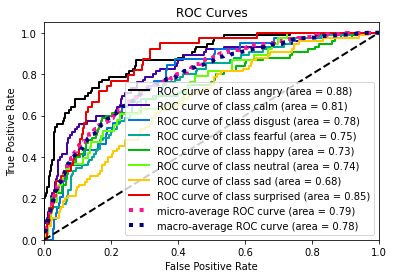

0.7780213736599731


In [29]:
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro"))

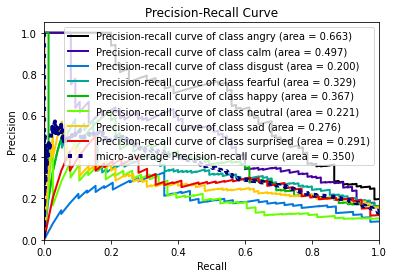

In [31]:
plot_precision_recall(y_test, clf.predict_proba(X_test))
plt.show()

##High emphasis

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_emotion,
    test_size=0.2, 
    random_state=0,
    stratify=y_emotion
)

In [39]:
# replacing training_set 
# (removing common samples between training_set and test_set)
X_train_index = df_data_emph_high.index
X_train_index = np.setdiff1d(X_train_index, y_test.index)

X_train = df_data_emph_high.loc[X_train_index].values
y_train = y_emotion_emph_high[X_train_index]

# standardizing the new training set and the test set
std_sclr = StandardScaler()
std_sclr.fit(X_train)
X_train = std_sclr.transform(X_train)
X_test = std_sclr.transform(X_test)

In [40]:
# get two baseline (for validation- and for test- set)
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)
dummy_clf.fit(X_train, y_train)

print(dummy_clf.score(X_test, y_test))

0.1629327902240326


In [41]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.82      0.43      0.56        75
        calm       0.40      0.37      0.39        75
     disgust       0.17      0.28      0.21        39
     fearful       0.51      0.27      0.35        75
       happy       0.33      0.36      0.34        75
     neutral       0.21      0.47      0.30        38
         sad       0.21      0.17      0.19        75
   surprised       0.35      0.44      0.39        39

    accuracy                           0.34       491
   macro avg       0.38      0.35      0.34       491
weighted avg       0.40      0.34      0.35       491



In [43]:
y_test_pred_proba = clf.predict_proba(X_test)

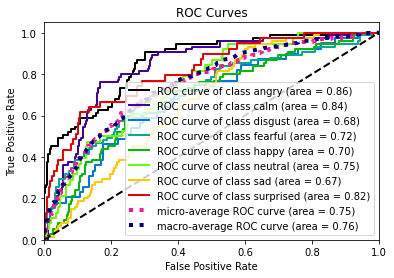

0.7538398710768255


In [44]:
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro"))

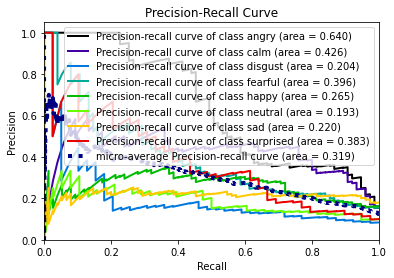

In [46]:
plot_precision_recall(y_test, clf.predict_proba(X_test))
plt.show()

##Low emphasis

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_emotion,
    test_size=0.2, 
    random_state=0,
    stratify=y_emotion
)

In [48]:
# split train- and test- set
X_train_index = df_data_emph_low.index
X_train_index = np.setdiff1d(X_train_index, y_test.index)

X_train = df_data_emph_low.loc[X_train_index].values
y_train = y_emotion_emph_low[X_train_index]

# standardizing the new training set and the test set
std_sclr = StandardScaler()
std_sclr.fit(X_train)
X_train = std_sclr.transform(X_train)
X_test = std_sclr.transform(X_test)

In [49]:
# get two baseline (for validation- and for test- set)
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)
dummy_clf.fit(X_train, y_train)

print(dummy_clf.score(X_test, y_test))

0.14867617107942974


In [50]:
# get two baseline (for validation- and for test- set)
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)
dummy_clf.fit(X_train, y_train)

print(dummy_clf.score(X_train, y_train))
print(dummy_clf.score(X_test, y_test))

0.1377049180327869
0.14867617107942974


In [52]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.36      0.61      0.46        75
        calm       0.41      0.41      0.41        75
     disgust       0.21      0.28      0.24        39
     fearful       0.26      0.11      0.15        75
       happy       0.13      0.09      0.11        75
     neutral       0.10      0.03      0.04        38
         sad       0.25      0.20      0.22        75
   surprised       0.20      0.41      0.26        39

    accuracy                           0.27       491
   macro avg       0.24      0.27      0.24       491
weighted avg       0.26      0.27      0.25       491



In [54]:
y_test_pred_proba = clf.predict_proba(X_test)

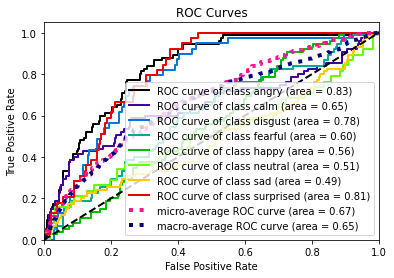

0.6525621009593289


In [55]:
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro"))

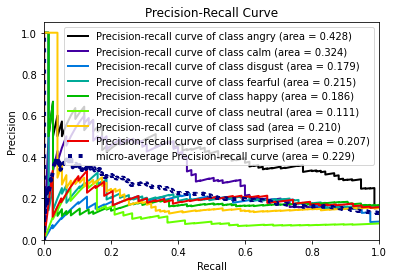

In [56]:
plot_precision_recall(y_test, clf.predict_proba(X_test))
plt.show()

#Emotion type

##All emphasis

In [63]:
# split train- and test- set
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_emtype,
    test_size=0.2, 
    random_state=0,
    stratify=y_emtype
)

# standardizing the new training set and the test set
std_sclr = StandardScaler()
std_sclr.fit(X_train)
X_train = std_sclr.transform(X_train)
X_test = std_sclr.transform(X_test)

In [64]:
# get two baseline (for validation- and for test- set)
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)
dummy_clf.fit(X_train, y_train)

print(dummy_clf.score(X_test, y_test))

0.4969450101832994


In [65]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      strong       0.84      0.79      0.81       303
        weak       0.69      0.76      0.72       188

    accuracy                           0.78       491
   macro avg       0.76      0.77      0.77       491
weighted avg       0.78      0.78      0.78       491



In [67]:
y_test_pred_proba = clf.predict_proba(X_test)[:, 1]

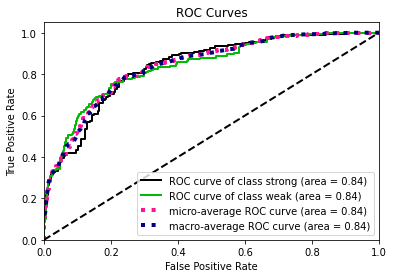

0.8375465206095077


In [68]:
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro"))

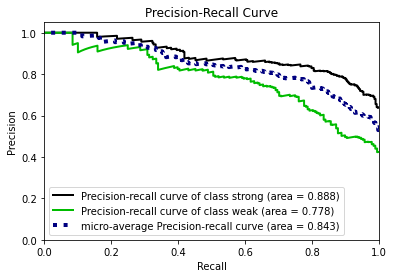

In [69]:
plot_precision_recall(y_test, clf.predict_proba(X_test))
plt.show()

##All emphasis (50% samples)

In [70]:
# split train- and test- set
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_emtype,
    train_size=0.5,
    test_size=0.2, 
    random_state=0,
    stratify=y_emtype
)

In [71]:
# get two baseline (for validation- and for test- set)
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)
dummy_clf.fit(X_train, y_train)

print(dummy_clf.score(X_test, y_test))

0.5213849287169042


In [72]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      strong       0.84      0.85      0.85       303
        weak       0.76      0.74      0.75       188

    accuracy                           0.81       491
   macro avg       0.80      0.80      0.80       491
weighted avg       0.81      0.81      0.81       491



In [74]:
y_test_pred_proba = clf.predict_proba(X_test)[:, 1]

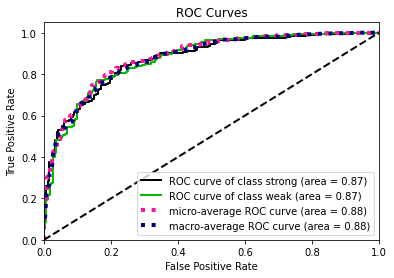

0.873516606979847


In [75]:
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro"))

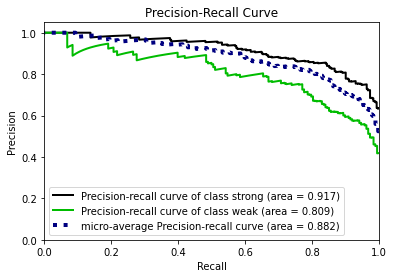

In [76]:
plot_precision_recall(y_test, clf.predict_proba(X_test))
plt.show()

##High emphasis

In [77]:
# split train- and test- set
X_train_index = df_data_emph_high.index
X_train_index = np.setdiff1d(X_train_index, y_test.index)

X_train = df_data_emph_high.loc[X_train_index].values
y_train = y_emtype_emph_high[X_train_index]

In [78]:
# get two baseline (for validation- and for test- set)
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)
dummy_clf.fit(X_train, y_train)

print(dummy_clf.score(X_test, y_test))

0.5030549898167006


In [79]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      strong       0.80      0.75      0.77       303
        weak       0.63      0.70      0.66       188

    accuracy                           0.73       491
   macro avg       0.71      0.72      0.72       491
weighted avg       0.73      0.73      0.73       491



In [81]:
y_test_pred_proba = clf.predict_proba(X_test)[:, 1]

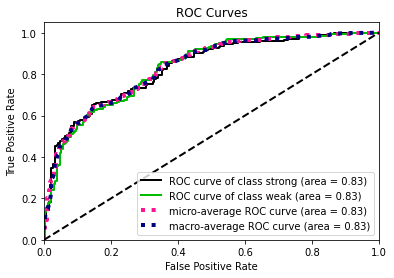

0.8309458605435011


In [82]:
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro"))

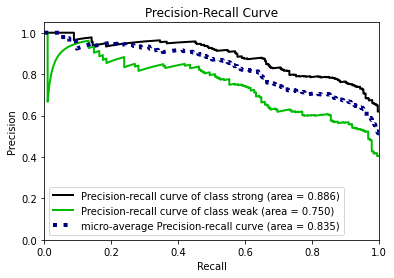

In [84]:
plot_precision_recall(y_test,clf.predict_proba(X_test))
plt.show()

##Low emphasis

In [85]:
# split train- and test- set
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_emtype,
    test_size=0.2, 
    random_state=0,
    stratify=y_emtype
)

In [87]:
# split train- and test- set
X_train_index = df_data_emph_low.index
X_train_index = np.setdiff1d(X_train_index, y_test.index)

X_train = df_data_emph_low.loc[X_train_index].values
y_train = y_emtype_emph_low[X_train_index]

# standardizing the new training set and the test set
std_sclr = StandardScaler()
std_sclr.fit(X_train)
X_train = std_sclr.transform(X_train)
X_test = std_sclr.transform(X_test)

In [88]:
# get two baseline (for validation- and for test- set)
dummy_clf = DummyClassifier(strategy="stratified", random_state=0)
dummy_clf.fit(X_train, y_train)

print(dummy_clf.score(X_test, y_test))

0.4969450101832994


In [89]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      strong       0.65      0.70      0.68       303
        weak       0.45      0.39      0.42       188

    accuracy                           0.58       491
   macro avg       0.55      0.55      0.55       491
weighted avg       0.57      0.58      0.58       491



In [91]:
y_test_pred_proba = clf.predict_proba(X_test)[:, 1]

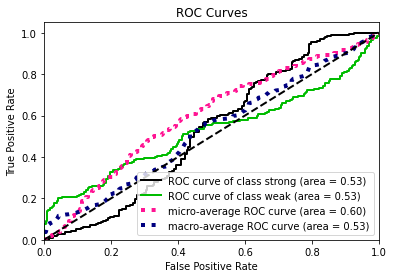

0.5258935468014887


In [92]:
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro"))

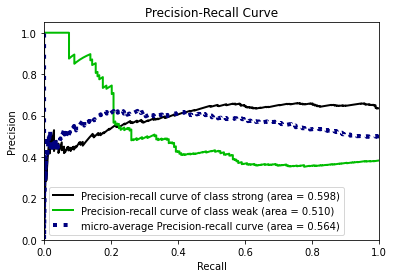

In [93]:
plot_precision_recall(y_test, clf.predict_proba(X_test))
plt.show()